In [1]:
# %%
import numpy as np
import otmol as otm
import pandas as pd
from openbabel import pybel
import matplotlib.pyplot as plt
import seaborn as sns
import os
#from experiment_utils import experiment
# %matplotlib widget

OTMol - ArbAlign

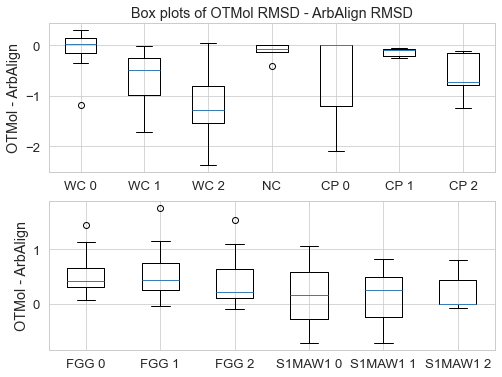

In [2]:
wc0_arbalign = pd.read_csv('./arbalign_output/ArbAlignDataWC_result.csv')['RMSD(ArbAlign)']
wc1_arbalign = pd.read_csv('./arbalign_output/1st2ndWC_result.csv')['RMSD(ArbAlign)']
wc2_arbalign = pd.read_csv('./arbalign_output/largest_RMSD_WC_result.csv')['RMSD(ArbAlign)']
ng_arbalign = pd.read_csv('./arbalign_output/NeonCluster_result.csv')['RMSD(ArbAlign)']
cp0_arbalign = pd.read_csv('./arbalign_output/cp_most_similar_result.csv')['RMSD(ArbAlign)']
cp1_arbalign = pd.read_csv('./arbalign_output/cp_most_different_result.csv')['RMSD(ArbAlign)']
cp2_arbalign = pd.read_csv('./arbalign_output/cp_largest_arbalign_result.csv')['RMSD(ArbAlign)']
FGG_arbalign_name = pd.read_csv('./arbalign_output/FGG_result.csv')['RMSD(ArbAlign+element name)']
FGG_arbalign_type = pd.read_csv('./arbalign_output/FGG_result.csv')['RMSD(ArbAlign+atom type)']
FGG_arbalign_conn = pd.read_csv('./arbalign_output/FGG_result.csv')['RMSD(ArbAlign+atom connectivity)']
S1MAW1_arbalign_name = pd.read_csv('./arbalign_output/S1MAW1_result.csv')['RMSD(ArbAlign+element name)']
S1MAW1_arbalign_type = pd.read_csv('./arbalign_output/S1MAW1_result.csv')['RMSD(ArbAlign+atom type)']
S1MAW1_arbalign_conn = pd.read_csv('./arbalign_output/S1MAW1_result.csv')['RMSD(ArbAlign+atom connectivity)']

wc0_otmol = pd.read_csv('./otmol_output/wc_ArbAlignDataWC_center_results.csv')['RMSD(OTMol)']
wc1_otmol = pd.read_csv('./otmol_output/wc_1st2nd_center_results.csv')['RMSD(OTMol)']
wc2_otmol = pd.read_csv('./otmol_output/wc_largest_rmsd_center_results.csv')['RMSD(OTMol)']
ng_otmol = pd.read_csv('./otmol_output/ng_emd_results.csv')['RMSD(OTMol)']
cp0_otmol = pd.read_csv('./otmol_output/cp_most_similar_fGW_cstD=0.5_results.csv')['RMSD(OTMol)']
cp1_otmol = pd.read_csv('./otmol_output/cp_most_different_fGW_cstD=0.5_results.csv')['RMSD(OTMol)']
cp2_otmol = pd.read_csv('./otmol_output/cp_largest_arbalign_fGW_cstD=0.5_results.csv')['RMSD(OTMol)']
FGG_otmol_name = pd.read_csv('./otmol_output/FGG_element_name_fGW_cstD=0.5_results.csv')['RMSD(OTMol+element name)']
FGG_otmol_type = pd.read_csv('./otmol_output/FGG_atom_type_fGW_cstD=0.5_results.csv')['RMSD(OTMol+atom type)']
FGG_otmol_conn = pd.read_csv('./otmol_output/FGG_atom_connectivity_fGW_cstD=0.5_results.csv')['RMSD(OTMol+atom connectivity)']
S1MAW1_otmol_name = pd.read_csv('./otmol_output/S1MAW1_element_name_fGW_cstD=1.0_results.csv')['RMSD(OTMol+element name)']
S1MAW1_otmol_type = pd.read_csv('./otmol_output/S1MAW1_atom_type_fGW_cstD=1.0_results.csv')['RMSD(OTMol+atom type)']
S1MAW1_otmol_conn = pd.read_csv('./otmol_output/S1MAW1_atom_connectivity_fGW_cstD=1.0_results.csv')['RMSD(OTMol+atom connectivity)']

wc0_diff = wc0_otmol - wc0_arbalign
wc1_diff = wc1_otmol - wc1_arbalign
wc2_diff = wc2_otmol - wc2_arbalign
ng_diff = ng_otmol - ng_arbalign
cp0_diff = cp0_otmol - cp0_arbalign
cp1_diff = cp1_otmol - cp1_arbalign
cp2_diff = cp2_otmol - cp2_arbalign
FGG_name_diff = FGG_otmol_name - FGG_arbalign_name
FGG_type_diff = FGG_otmol_type - FGG_arbalign_type
FGG_conn_diff = FGG_otmol_conn - FGG_arbalign_conn
S1MAW1_name_diff = S1MAW1_otmol_name - S1MAW1_arbalign_name
S1MAW1_type_diff = S1MAW1_otmol_type - S1MAW1_arbalign_type
S1MAW1_conn_diff = S1MAW1_otmol_conn - S1MAW1_arbalign_conn
all_data = [
    wc0_diff, wc1_diff, wc2_diff, ng_diff, cp0_diff, cp1_diff, cp2_diff,
    FGG_name_diff, FGG_type_diff, FGG_conn_diff,
    S1MAW1_name_diff, S1MAW1_type_diff, S1MAW1_conn_diff
]
labels = [
    'WC 0', 'WC 1', 'WC 2', 
    'NC', 'CP 0', 'CP 1', 'CP 2',
    'FGG 0', 'FGG 1', 'FGG 2',
    'S1MAW1 0', 'S1MAW1 1', 'S1MAW1 2'
]
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Set1") 
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
plt.rcParams.update({'font.size': 12})  # Adjust the number to your desired size
axs[0].boxplot(all_data[:-6])
axs[0].set_title('Box plots of OTMol RMSD - ArbAlign RMSD')
axs[0].set_xticks(
    [y + 1 for y in range(len(all_data[:-6]))],
    labels=labels[:-6]
)
#axs[0].set_xlabel('Different datasets')
axs[0].set_ylabel('OTMol - ArbAlign')
axs[0].yaxis.grid(True)

axs[1].boxplot(all_data[-6:])
#axs[1].set_title('')
axs[1].set_xticks(
    [y + 1 for y in range(len(all_data[-6:]))],
    labels=labels[-6:]
)
#axs[0].set_xlabel('Different datasets')
axs[1].set_ylabel('OTMol - ArbAlign')
axs[1].yaxis.grid(True)
plt.savefig('../images/boxplot_arbalign.png', dpi=300, bbox_inches='tight')
plt.show()

OTMol - ArbAlign EMD

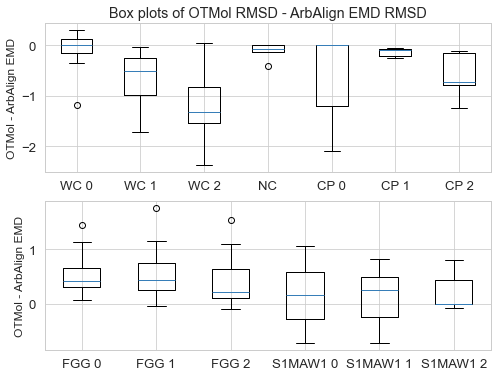

In [3]:
wc0_arbalign = pd.read_csv('./arbalign_emd_output/ArbAlignDataWC_result.csv')['RMSD(ArbAlign)']
wc1_arbalign = pd.read_csv('./arbalign_emd_output/1st2ndWC_result.csv')['RMSD(ArbAlign)']
wc2_arbalign = pd.read_csv('./arbalign_emd_output/largest_RMSD_WC_result.csv')['RMSD(ArbAlign)']
ng_arbalign = pd.read_csv('./arbalign_emd_output/NeonCluster_result.csv')['RMSD(ArbAlign)']
cp0_arbalign = pd.read_csv('./arbalign_emd_output/cp_most_similar_result.csv')['RMSD(ArbAlign)']
cp1_arbalign = pd.read_csv('./arbalign_emd_output/cp_most_different_result.csv')['RMSD(ArbAlign)']
cp2_arbalign = pd.read_csv('./arbalign_emd_output/cp_largest_arbalign_result.csv')['RMSD(ArbAlign)']
FGG_arbalign_name = pd.read_csv('./arbalign_emd_output/FGG_result.csv')['RMSD(ArbAlign+element name)']
FGG_arbalign_type = pd.read_csv('./arbalign_emd_output/FGG_result.csv')['RMSD(ArbAlign+atom type)']
FGG_arbalign_conn = pd.read_csv('./arbalign_emd_output/FGG_result.csv')['RMSD(ArbAlign+atom connectivity)']
S1MAW1_arbalign_name = pd.read_csv('./arbalign_emd_output/S1MAW1_result.csv')['RMSD(ArbAlign+element name)']
S1MAW1_arbalign_type = pd.read_csv('./arbalign_emd_output/S1MAW1_result.csv')['RMSD(ArbAlign+atom type)']
S1MAW1_arbalign_conn = pd.read_csv('./arbalign_emd_output/S1MAW1_result.csv')['RMSD(ArbAlign+atom connectivity)']

wc0_otmol = pd.read_csv('./otmol_output/wc_ArbAlignDataWC_emd_results.csv')['RMSD(OTMol)']
wc1_otmol = pd.read_csv('./otmol_output/wc_1st2nd_emd_results.csv')['RMSD(OTMol)']
wc2_otmol = pd.read_csv('./otmol_output/wc_largest_rmsd_emd_results.csv')['RMSD(OTMol)']
ng_otmol = pd.read_csv('./otmol_output/ng_emd_results.csv')['RMSD(OTMol)']
cp0_otmol = pd.read_csv('./otmol_output/cp_most_similar_fGW_cstD=0.5_results.csv')['RMSD(OTMol)']
cp1_otmol = pd.read_csv('./otmol_output/cp_most_different_fGW_cstD=0.5_results.csv')['RMSD(OTMol)']
cp2_otmol = pd.read_csv('./otmol_output/cp_largest_arbalign_fGW_cstD=0.5_results.csv')['RMSD(OTMol)']
FGG_otmol_name = pd.read_csv('./otmol_output/FGG_element_name_fGW_cstD=0.5_results.csv')['RMSD(OTMol+element name)']
FGG_otmol_type = pd.read_csv('./otmol_output/FGG_atom_type_fGW_cstD=0.5_results.csv')['RMSD(OTMol+atom type)']
FGG_otmol_conn = pd.read_csv('./otmol_output/FGG_atom_connectivity_fGW_cstD=0.5_results.csv')['RMSD(OTMol+atom connectivity)']
S1MAW1_otmol_name = pd.read_csv('./otmol_output/S1MAW1_element_name_fGW_cstD=1.0_results.csv')['RMSD(OTMol+element name)']
S1MAW1_otmol_type = pd.read_csv('./otmol_output/S1MAW1_atom_type_fGW_cstD=1.0_results.csv')['RMSD(OTMol+atom type)']
S1MAW1_otmol_conn = pd.read_csv('./otmol_output/S1MAW1_atom_connectivity_fGW_cstD=1.0_results.csv')['RMSD(OTMol+atom connectivity)']

wc0_diff = wc0_otmol - wc0_arbalign
wc1_diff = wc1_otmol - wc1_arbalign
wc2_diff = wc2_otmol - wc2_arbalign
ng_diff = ng_otmol - ng_arbalign
cp0_diff = cp0_otmol - cp0_arbalign
cp1_diff = cp1_otmol - cp1_arbalign
cp2_diff = cp2_otmol - cp2_arbalign
FGG_name_diff = FGG_otmol_name - FGG_arbalign_name
FGG_type_diff = FGG_otmol_type - FGG_arbalign_type
FGG_conn_diff = FGG_otmol_conn - FGG_arbalign_conn
S1MAW1_name_diff = S1MAW1_otmol_name - S1MAW1_arbalign_name
S1MAW1_type_diff = S1MAW1_otmol_type - S1MAW1_arbalign_type
S1MAW1_conn_diff = S1MAW1_otmol_conn - S1MAW1_arbalign_conn
all_data = [
    wc0_diff, wc1_diff, wc2_diff, ng_diff, cp0_diff, cp1_diff, cp2_diff,
    FGG_name_diff, FGG_type_diff, FGG_conn_diff,
    S1MAW1_name_diff, S1MAW1_type_diff, S1MAW1_conn_diff
]
labels = [
    'WC 0', 'WC 1', 'WC 2', 
    'NC', 'CP 0', 'CP 1', 'CP 2',
    'FGG 0', 'FGG 1', 'FGG 2',
    'S1MAW1 0', 'S1MAW1 1', 'S1MAW1 2'
]
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Set1") 
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
plt.rcParams.update({'font.size': 12})  # Adjust the number to your desired size
axs[0].boxplot(all_data[:-6])
axs[0].set_title('Box plots of OTMol RMSD - ArbAlign EMD RMSD')
axs[0].set_xticks(
    [y + 1 for y in range(len(all_data[:-6]))],
    labels=labels[:-6]
)
#axs[0].set_xlabel('Different datasets')
axs[0].set_ylabel('OTMol - ArbAlign EMD', fontsize=12)
axs[0].yaxis.grid(True)

axs[1].boxplot(all_data[-6:])
#axs[1].set_title('')
axs[1].set_xticks(
    [y + 1 for y in range(len(all_data[-6:]))],
    labels=labels[-6:]
)
axs[1].set_ylabel('OTMol - ArbAlign EMD', fontsize=12)
axs[1].yaxis.grid(True)
plt.savefig('../images/boxplot_arbalign_emd.png', dpi=300, bbox_inches='tight')
plt.show()

c = 0.5 - c = 0

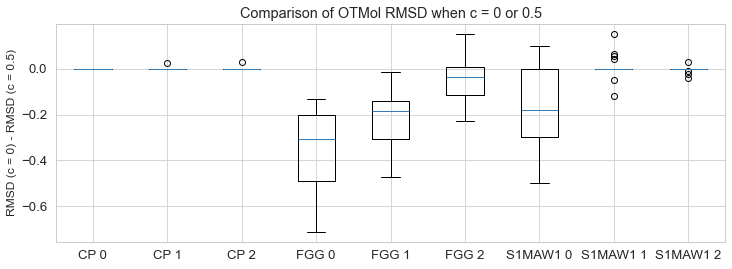

In [5]:
cp0_otmol = pd.read_csv('./otmol_output/cp_most_similar_fGW_cstD=0.0_results.csv')['RMSD(OTMol)']
cp1_otmol = pd.read_csv('./otmol_output/cp_most_different_fGW_cstD=0.0_results.csv')['RMSD(OTMol)']
cp2_otmol = pd.read_csv('./otmol_output/cp_largest_arbalign_fGW_cstD=0.0_results.csv')['RMSD(OTMol)']
FGG_otmol_name = pd.read_csv('./otmol_output/FGG_element_name_fGW_cstD=0.0_results.csv')['RMSD(OTMol+element name)']
FGG_otmol_type = pd.read_csv('./otmol_output/FGG_atom_type_fGW_cstD=0.0_results.csv')['RMSD(OTMol+atom type)']
FGG_otmol_conn = pd.read_csv('./otmol_output/FGG_atom_connectivity_fGW_cstD=0.0_results.csv')['RMSD(OTMol+atom connectivity)']
S1MAW1_otmol_name = pd.read_csv('./otmol_output/S1MAW1_element_name_fGW_cstD=0.0_results.csv')['RMSD(OTMol+element name)']
S1MAW1_otmol_type = pd.read_csv('./otmol_output/S1MAW1_atom_type_fGW_cstD=0.0_results.csv')['RMSD(OTMol+atom type)']
S1MAW1_otmol_conn = pd.read_csv('./otmol_output/S1MAW1_atom_connectivity_fGW_cstD=0.0_results.csv')['RMSD(OTMol+atom connectivity)']

cp0_otmol_ = pd.read_csv('./otmol_output/cp_most_similar_fGW_cstD=0.5_results.csv')['RMSD(OTMol)']
cp1_otmol_ = pd.read_csv('./otmol_output/cp_most_different_fGW_cstD=0.5_results.csv')['RMSD(OTMol)']
cp2_otmol_ = pd.read_csv('./otmol_output/cp_largest_arbalign_fGW_cstD=0.5_results.csv')['RMSD(OTMol)']
FGG_otmol_name_ = pd.read_csv('./otmol_output/FGG_element_name_fGW_cstD=0.5_results.csv')['RMSD(OTMol+element name)']
FGG_otmol_type_ = pd.read_csv('./otmol_output/FGG_atom_type_fGW_cstD=0.5_results.csv')['RMSD(OTMol+atom type)']
FGG_otmol_conn_ = pd.read_csv('./otmol_output/FGG_atom_connectivity_fGW_cstD=0.5_results.csv')['RMSD(OTMol+atom connectivity)']
S1MAW1_otmol_name_ = pd.read_csv('./otmol_output/S1MAW1_element_name_fGW_cstD=0.5_results.csv')['RMSD(OTMol+element name)']
S1MAW1_otmol_type_ = pd.read_csv('./otmol_output/S1MAW1_atom_type_fGW_cstD=0.5_results.csv')['RMSD(OTMol+atom type)']
S1MAW1_otmol_conn_ = pd.read_csv('./otmol_output/S1MAW1_atom_connectivity_fGW_cstD=0.5_results.csv')['RMSD(OTMol+atom connectivity)']

cp0_diff = cp0_otmol - cp0_otmol_
cp1_diff = cp1_otmol - cp1_otmol_
cp2_diff = cp2_otmol - cp2_otmol_
FGG_name_diff = FGG_otmol_name - FGG_otmol_name_
FGG_type_diff = FGG_otmol_type - FGG_otmol_type_
FGG_conn_diff = FGG_otmol_conn - FGG_otmol_conn_
S1MAW1_name_diff = S1MAW1_otmol_name - S1MAW1_otmol_name_
S1MAW1_type_diff = S1MAW1_otmol_type - S1MAW1_otmol_type_
S1MAW1_conn_diff = S1MAW1_otmol_conn - S1MAW1_otmol_conn_
all_data = [
    cp0_diff, cp1_diff, cp2_diff,
    FGG_name_diff, FGG_type_diff, FGG_conn_diff,
    S1MAW1_name_diff, S1MAW1_type_diff, S1MAW1_conn_diff
]
labels = [
    'CP 0', 'CP 1', 'CP 2',
    'FGG 0', 'FGG 1', 'FGG 2',
    'S1MAW1 0', 'S1MAW1 1', 'S1MAW1 2'
]
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Set1") 
fig, axs = plt.subplots(figsize=(12, 4))
#plt.rcParams.update({'font.size': 12})  # Adjust the number to your desired size
axs.boxplot(all_data)
axs.set_title('Comparison of OTMol RMSD when c = 0 or 0.5')
axs.set_xticks(
    [y + 1 for y in range(len(all_data))],
    labels=labels
)
#axs[0].set_xlabel('Different datasets')
axs.set_ylabel('RMSD (c = 0) - RMSD (c = 0.5)', fontsize=12)
axs.yaxis.grid(True)

plt.savefig('../images/boxplot_c_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

OTMol - GW

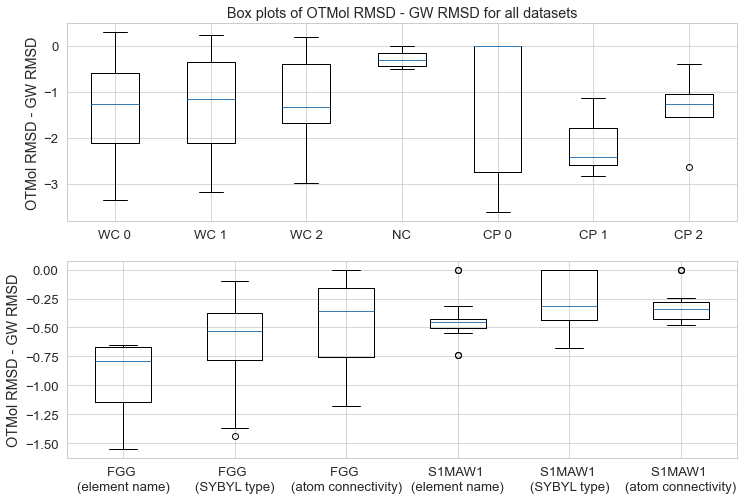

In [6]:
"""
wc0_GW = pd.read_csv('./GW_output/wc_ArbAlignDataWC_results.csv')['RMSD(GW)']
wc1_GW = pd.read_csv('./GW_output/wc_1st2nd_results.csv')['RMSD(GW)']
wc2_GW = pd.read_csv('./GW_output/wc_largest_rmsd_results.csv')['RMSD(GW)']
ng_GW = pd.read_csv('./GW_output/ng_results.csv')['RMSD(GW)']
cp0_GW = pd.read_csv('./GW_output/cp_most_similar_results.csv')['RMSD(GW)']
cp1_GW = pd.read_csv('./GW_output/cp_most_different_results.csv')['RMSD(GW)']
cp2_GW = pd.read_csv('./GW_output/cp_largest_arbalign_results.csv')['RMSD(GW)']
FGG_GW_name = pd.read_csv('./GW_output/FGG_element_name_results.csv')['RMSD(GW+element name)']
FGG_GW_type = pd.read_csv('./GW_output/FGG_atom_type_results.csv')['RMSD(GW+atom type)']
FGG_GW_conn = pd.read_csv('./GW_output/FGG_atom_connectivity_results.csv')['RMSD(GW+atom connectivity)']
S1MAW1_GW_name = pd.read_csv('./GW_output/S1MAW1_element_name_results.csv')['RMSD(GW+element name)']
S1MAW1_GW_type = pd.read_csv('./GW_output/S1MAW1_atom_type_results.csv')['RMSD(GW+atom type)']
S1MAW1_GW_conn = pd.read_csv('./GW_output/S1MAW1_atom_connectivity_results.csv')['RMSD(GW+atom connectivity)']

wc0_otmol = pd.read_csv('./otmol_output/wc_ArbAlignDataWC_emd_results.csv')['RMSD(OTMol)']
wc1_otmol = pd.read_csv('./otmol_output/wc_1st2nd_emd_results.csv')['RMSD(OTMol)']
wc2_otmol = pd.read_csv('./otmol_output/wc_largest_rmsd_emd_results.csv')['RMSD(OTMol)']
ng_otmol = pd.read_csv('./otmol_output/ng_emd_results.csv')['RMSD(OTMol)']
cp0_otmol = pd.read_csv('./otmol_output/cp_most_similar_fGW_emd_results.csv')['RMSD(OTMol)']
cp1_otmol = pd.read_csv('./otmol_output/cp_most_different_fGW_emd_results.csv')['RMSD(OTMol)']
cp2_otmol = pd.read_csv('./otmol_output/cp_largest_arbalign_fGW_emd_results.csv')['RMSD(OTMol)']
FGG_otmol_name = pd.read_csv('./otmol_output/FGG_element_name_fGW_emd_results.csv')['RMSD(OTMol+element name)']
FGG_otmol_type = pd.read_csv('./otmol_output/FGG_atom_type_fGW_emd_results.csv')['RMSD(OTMol+atom type)']
FGG_otmol_conn = pd.read_csv('./otmol_output/FGG_atom_connectivity_fGW_emd_results.csv')['RMSD(OTMol+atom connectivity)']
S1MAW1_otmol_name = pd.read_csv('./otmol_output/S1MAW1_element_name_fGW_emd_results.csv')['RMSD(OTMol+element name)']
S1MAW1_otmol_type = pd.read_csv('./otmol_output/S1MAW1_atom_type_fGW_emd_results.csv')['RMSD(OTMol+atom type)']
S1MAW1_otmol_conn = pd.read_csv('./otmol_output/S1MAW1_atom_connectivity_fGW_emd_results.csv')['RMSD(OTMol+atom connectivity)']

wc0_diff = wc0_otmol - wc0_GW
wc1_diff = wc1_otmol - wc1_GW
wc2_diff = wc2_otmol - wc2_GW
ng_diff = ng_otmol - ng_GW
cp0_diff = cp0_otmol - cp0_GW
cp1_diff = cp1_otmol - cp1_GW
cp2_diff = cp2_otmol - cp2_GW
FGG_otmol_name_diff = FGG_otmol_name - FGG_GW_name
FGG_otmol_type_diff = FGG_otmol_type - FGG_GW_type
FGG_otmol_conn_diff = FGG_otmol_conn - FGG_GW_conn
S1MAW1_otmol_name_diff = S1MAW1_otmol_name - S1MAW1_GW_name
S1MAW1_otmol_type_diff = S1MAW1_otmol_type - S1MAW1_GW_type
S1MAW1_otmol_conn_diff = S1MAW1_otmol_conn - S1MAW1_GW_conn
all_data = [
    wc0_diff, wc1_diff, wc2_diff, ng_diff, cp0_diff, cp1_diff, cp2_diff,
    FGG_otmol_name_diff, FGG_otmol_type_diff, FGG_otmol_conn_diff,
    S1MAW1_otmol_name_diff, S1MAW1_otmol_type_diff, S1MAW1_otmol_conn_diff
]
labels = [
    'WC 0', 'WC 1', 'WC 2', 
    'NC', 'CP 0', 'CP 1', 'CP 2',
    'FGG \n(element name)', 'FGG \n(SYBYL type)', 'FGG \n(atom connectivity)',
    'S1MAW1 \n(element name)', 'S1MAW1 \n(SYBYL type)', 'S1MAW1 \n(atom connectivity)'
]
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Set1") 
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
plt.rcParams.update({'font.size': 12})  # Adjust the number to your desired size
axs[0].boxplot(all_data[:-6])
axs[0].set_title('Box plots of OTMol RMSD - GW RMSD for all datasets')
axs[0].set_xticks(
    [y + 1 for y in range(len(all_data[:-6]))],
    labels=labels[:-6]
)
#axs[0].set_xlabel('Different datasets')
axs[0].set_ylabel('OTMol RMSD - GW RMSD')
axs[0].yaxis.grid(True)

axs[1].boxplot(all_data[-6:])
#axs[1].set_title('')
axs[1].set_xticks(
    [y + 1 for y in range(len(all_data[-6:]))],
    labels=labels[-6:]
)
#axs[0].set_xlabel('Different datasets')
axs[1].set_ylabel('OTMol RMSD - GW RMSD')
axs[1].yaxis.grid(True)
plt.savefig('../images/boxplot_GW.png', dpi=300, bbox_inches='tight')
plt.show()
"""

ArbAlign EMD - ArbAlign

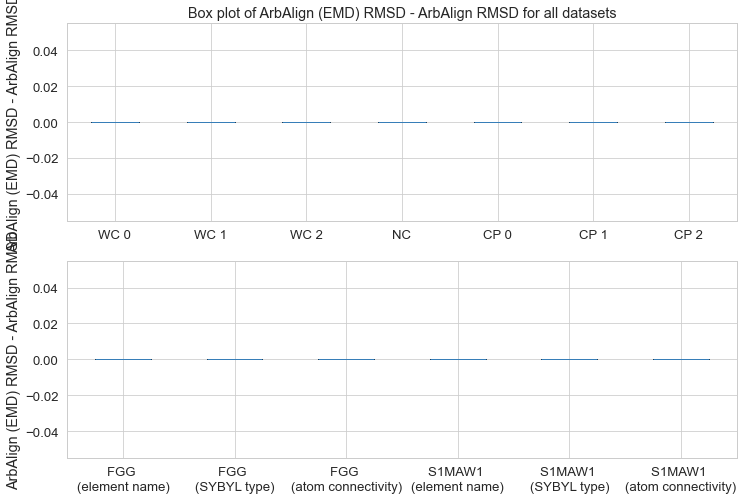

In [7]:
wc0_arbalign_emd = pd.read_csv('./arbalign_emd_output/ArbAlignDataWC_result.csv')['RMSD(ArbAlign)']
wc1_arbalign_emd = pd.read_csv('./arbalign_emd_output/1st2ndWC_result.csv')['RMSD(ArbAlign)']
wc2_arbalign_emd = pd.read_csv('./arbalign_emd_output/largest_RMSD_WC_result.csv')['RMSD(ArbAlign)']
ng_arbalign_emd = pd.read_csv('./arbalign_emd_output/NeonCluster_result.csv')['RMSD(ArbAlign)']
cp0_arbalign_emd = pd.read_csv('./arbalign_emd_output/cp_most_similar_result.csv')['RMSD(ArbAlign)']
cp1_arbalign_emd = pd.read_csv('./arbalign_emd_output/cp_most_different_result.csv')['RMSD(ArbAlign)']
cp2_arbalign_emd = pd.read_csv('./arbalign_emd_output/cp_largest_arbalign_result.csv')['RMSD(ArbAlign)']
FGG_arbalign_name_emd = pd.read_csv('./arbalign_emd_output/FGG_result.csv')['RMSD(ArbAlign+element name)']
FGG_arbalign_type_emd = pd.read_csv('./arbalign_emd_output/FGG_result.csv')['RMSD(ArbAlign+atom type)']
FGG_arbalign_conn_emd = pd.read_csv('./arbalign_emd_output/FGG_result.csv')['RMSD(ArbAlign+atom connectivity)']
S1MAW1_arbalign_name_emd = pd.read_csv('./arbalign_emd_output/S1MAW1_result.csv')['RMSD(ArbAlign+element name)']
S1MAW1_arbalign_type_emd = pd.read_csv('./arbalign_emd_output/S1MAW1_result.csv')['RMSD(ArbAlign+atom type)']
S1MAW1_arbalign_conn_emd = pd.read_csv('./arbalign_emd_output/S1MAW1_result.csv')['RMSD(ArbAlign+atom connectivity)']

wc0_arbalign = pd.read_csv('./arbalign_output/ArbAlignDataWC_result.csv')['RMSD(ArbAlign)']
wc1_arbalign = pd.read_csv('./arbalign_output/1st2ndWC_result.csv')['RMSD(ArbAlign)']
wc2_arbalign = pd.read_csv('./arbalign_output/largest_RMSD_WC_result.csv')['RMSD(ArbAlign)']
ng_arbalign = pd.read_csv('./arbalign_output/NeonCluster_result.csv')['RMSD(ArbAlign)']
cp0_arbalign = pd.read_csv('./arbalign_output/cp_most_similar_result.csv')['RMSD(ArbAlign)']
cp1_arbalign = pd.read_csv('./arbalign_output/cp_most_different_result.csv')['RMSD(ArbAlign)']
cp2_arbalign = pd.read_csv('./arbalign_output/cp_largest_arbalign_result.csv')['RMSD(ArbAlign)']
FGG_arbalign_name = pd.read_csv('./arbalign_output/FGG_result.csv')['RMSD(ArbAlign+element name)']
FGG_arbalign_type = pd.read_csv('./arbalign_output/FGG_result.csv')['RMSD(ArbAlign+atom type)']
FGG_arbalign_conn = pd.read_csv('./arbalign_output/FGG_result.csv')['RMSD(ArbAlign+atom connectivity)']
S1MAW1_arbalign_name = pd.read_csv('./arbalign_output/S1MAW1_result.csv')['RMSD(ArbAlign+element name)']
S1MAW1_arbalign_type = pd.read_csv('./arbalign_output/S1MAW1_result.csv')['RMSD(ArbAlign+atom type)']
S1MAW1_arbalign_conn = pd.read_csv('./arbalign_output/S1MAW1_result.csv')['RMSD(ArbAlign+atom connectivity)']

wc0_diff = wc0_arbalign_emd - wc0_arbalign
wc1_diff = wc1_arbalign_emd - wc1_arbalign
wc2_diff = wc2_arbalign_emd - wc2_arbalign
ng_diff = ng_arbalign_emd - ng_arbalign
cp0_diff = cp0_arbalign_emd - cp0_arbalign
cp1_diff = cp1_arbalign_emd - cp1_arbalign
cp2_diff = cp2_arbalign_emd - cp2_arbalign
FGG_otmol_name_diff = FGG_arbalign_name_emd - FGG_arbalign_name
FGG_otmol_type_diff = FGG_arbalign_type_emd - FGG_arbalign_type
FGG_otmol_conn_diff = FGG_arbalign_conn_emd - FGG_arbalign_conn
S1MAW1_otmol_name_diff = S1MAW1_arbalign_name_emd - S1MAW1_arbalign_name
S1MAW1_otmol_type_diff = S1MAW1_arbalign_type_emd - S1MAW1_arbalign_type
S1MAW1_otmol_conn_diff = S1MAW1_arbalign_conn_emd - S1MAW1_arbalign_conn
all_data = [
    wc0_diff, wc1_diff, wc2_diff, ng_diff, cp0_diff, cp1_diff, cp2_diff,
    FGG_otmol_name_diff, FGG_otmol_type_diff, FGG_otmol_conn_diff,
    S1MAW1_otmol_name_diff, S1MAW1_otmol_type_diff, S1MAW1_otmol_conn_diff
]
labels = [
    'WC 0', 'WC 1', 'WC 2', 
    'NC', 'CP 0', 'CP 1', 'CP 2',
    'FGG \n(element name)', 'FGG \n(SYBYL type)', 'FGG \n(atom connectivity)',
    'S1MAW1 \n(element name)', 'S1MAW1 \n(SYBYL type)', 'S1MAW1 \n(atom connectivity)'
]
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Set1") 
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
plt.rcParams.update({'font.size': 12})  # Adjust the number to your desired size
axs[0].boxplot(all_data[:-6])
axs[0].set_title('Box plot of ArbAlign (EMD) RMSD - ArbAlign RMSD for all datasets')
axs[0].set_xticks(
    [y + 1 for y in range(len(all_data[:-6]))],
    labels=labels[:-6]
)
#axs[0].set_xlabel('Different datasets')
axs[0].set_ylabel('ArbAlign (EMD) RMSD - ArbAlign RMSD')
axs[0].yaxis.grid(True)

axs[1].boxplot(all_data[-6:])
#axs[1].set_title('')
axs[1].set_xticks(
    [y + 1 for y in range(len(all_data[-6:]))],
    labels=labels[-6:]
)
#axs[0].set_xlabel('Different datasets')
axs[1].set_ylabel('ArbAlign (EMD) RMSD - ArbAlign RMSD')
axs[1].yaxis.grid(True)
#plt.savefig('../images/boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

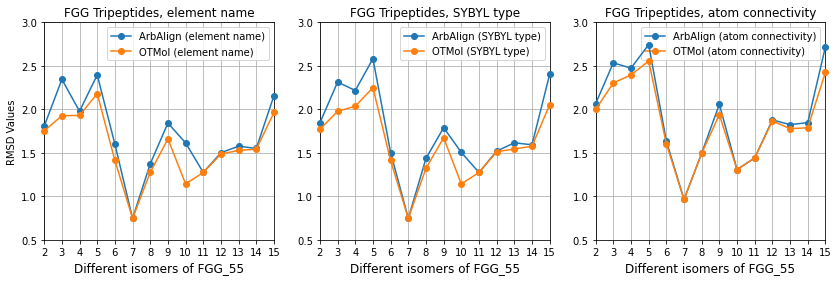

In [4]:
arbalign_res = pd.read_csv('./arbalign_output/FGG_result.csv')

combined_df = pd.concat([
    arbalign_res.rename(columns={
        'RMSD(ArbAlign+element name)': 'ArbAlign (element name)', 
        'RMSD(ArbAlign+atom type)': 'ArbAlign (SYBYL type)',
        'RMSD(ArbAlign+atom connectivity)': 'ArbAlign (atom connectivity)'
        }), 
    otmol_name_res.rename(columns={'RMSD(OTMol+element name)': 'OTMol (element name)'}), 
    otmol_type_res.rename(columns={'RMSD(OTMol+atom type)': 'OTMol (SYBYL type)'}), 
    otmol_conn_res.rename(columns={'RMSD(OTMol+atom connectivity)': 'OTMol (atom connectivity)'}
    ), 
    ], axis=1)

plt.figure(figsize=(14,4))
plt.subplot(131)
columns_to_plot = ["ArbAlign (element name)", "OTMol (element name)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, element name")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend()
plt.grid(True)

plt.subplot(132)
columns_to_plot = ["ArbAlign (SYBYL type)", "OTMol (SYBYL type)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, SYBYL type")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend()
plt.grid(True)

plt.subplot(133)
columns_to_plot = ["ArbAlign (atom connectivity)", "OTMol (atom connectivity)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, atom connectivity")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend(loc='upper right')
plt.grid(True)

plt.savefig('../images/FGG.png', dpi=300, bbox_inches='tight')

No valid permutation found


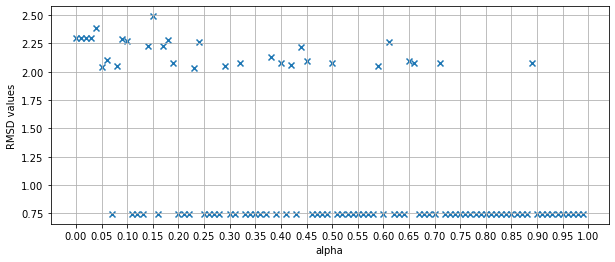

In [4]:
alpha_list = np.linspace(0, 1, 101)
alpha_result = alpha_experiment(data_path, '252_FGG55', '258_FGG224', alpha_list=alpha_list)
plt.figure(figsize=(10,4))
plt.scatter(alpha_result['alpha'], alpha_result['RMSD(OTMol+element name)'], marker='x')
plt.xlabel('alpha')
plt.ylabel('RMSD values')
plt.xticks(np.linspace(0, 1, 21))
plt.grid(True)

No valid permutation found


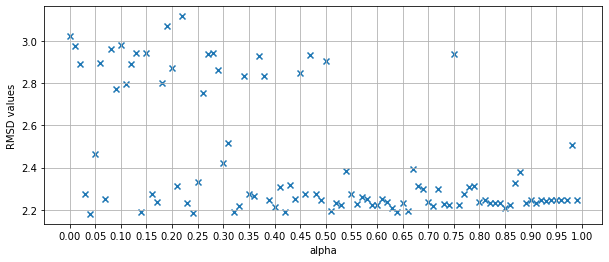

In [5]:
alpha_list = np.linspace(0, 1, 101)
alpha_result = alpha_experiment(data_path, '252_FGG55', '256_FGG366', alpha_list=alpha_list)
plt.figure(figsize=(10,4))
plt.scatter(alpha_result['alpha'], alpha_result['RMSD(OTMol+element name)'], marker='x')
plt.xlabel('alpha')
plt.ylabel('RMSD values')
plt.xticks(np.linspace(0, 1, 21))
plt.grid(True)

In [ ]:
#otmol_name_res = experiment(data_path, molecule_pairs, setup='element name', alpha_list=np.linspace(0,1,101), reflection=False, save=False)
#otmol_type_res = experiment(data_path, molecule_pairs, setup='atom type', alpha_list=np.linspace(0,1,101), reflection=False, save=False)
#otmol_conn_res = experiment(data_path, molecule_pairs, setup='atom connectivity', alpha_list=np.linspace(0,1,101), reflection=False, save=False)

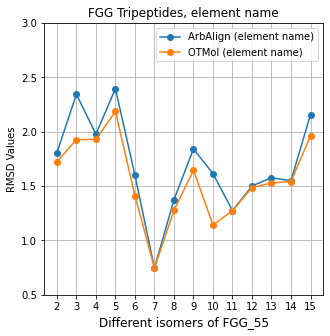

In [ ]:
columns_to_plot = ["ArbAlign (element name)", "OTMol (element name)"]
plt.figure(figsize=(5,5))
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column)
plt.title("FGG Tripeptides, element name")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)
plt.savefig('../images/FGG_element_name.png', dpi=300, bbox_inches='tight')

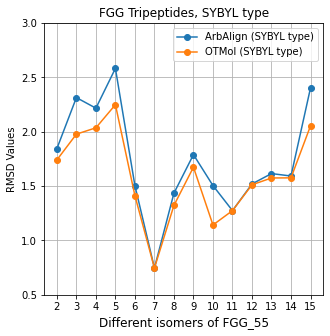

In [ ]:
columns_to_plot = ["ArbAlign (SYBYL type)", "OTMol (SYBYL type)"]
plt.figure(figsize=(5,5))
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column)
plt.title("FGG Tripeptides, SYBYL type")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)
plt.savefig('../images/FGG_SYBYL_type.png', dpi=300, bbox_inches='tight')

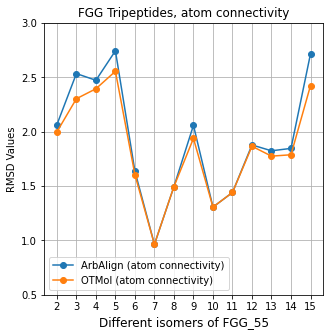

In [ ]:
columns_to_plot = ["ArbAlign (atom connectivity)", "OTMol (atom connectivity)"]
plt.figure(figsize=(5,5))
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column)
plt.title("FGG Tripeptides, atom connectivity")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)
plt.savefig('../images/FGG_atom_connectivity.png', dpi=300, bbox_inches='tight')

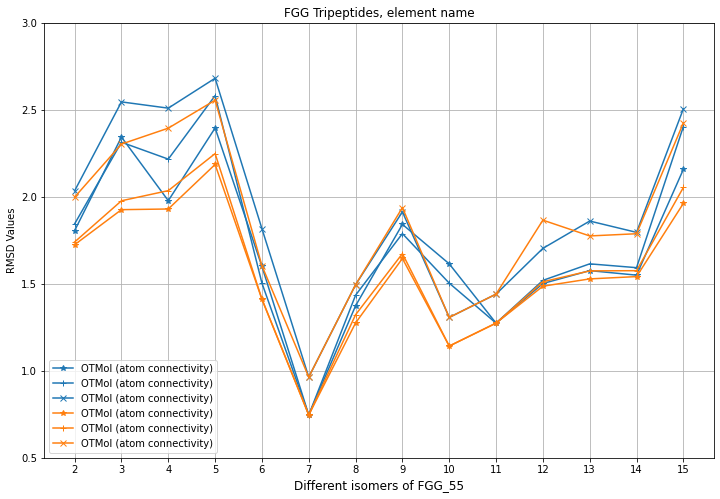

In [ ]:
arbalign_res = pd.read_csv(os.path.join(data_path, 'rmsd-2017.dat'), sep='\s+')
combined_df = pd.concat([
    arbalign_res.rename(columns={
        'RMSD(KM-ByAtomName)': 'ArbAlign (element name)', 
        'RMSD(KM-ByAtomType)': 'ArbAlign (SYBYL type)', 
        'RMSD(KM-byAtomConn)': 'ArbAlign (atom connectivity)'
        }), 
    otmol_name_res.rename(columns={'RMSD(OTMol+element name)': 'OTMol (element name)'}), 
    otmol_type_res.rename(columns={'RMSD(OTMol+atom type)': 'OTMol (SYBYL type)'}), 
    otmol_conn_res.rename(columns={'RMSD(OTMol+atom connectivity)': 'OTMol (atom connectivity)'}
    ), 
    ], axis=1)
columns_to_plot = ["ArbAlign (element name)", "OTMol (element name)"]
plt.figure(figsize=(12,8))
#for column in columns_to_plot:

plt.plot(range(2,16), combined_df['ArbAlign (element name)'], marker='*', color='#1f77b4', label=column)
plt.plot(range(2,16), combined_df['ArbAlign (SYBYL type)'], marker='+',  color='#1f77b4', label=column)
plt.plot(range(2,16), combined_df['ArbAlign (atom connectivity)'], marker='x', color='#1f77b4', label=column)
plt.plot(range(2,16), combined_df['OTMol (element name)'], marker='*', color='#ff7f0e', label=column)
plt.plot(range(2,16), combined_df['OTMol (SYBYL type)'], marker='+', color='#ff7f0e', label=column)
plt.plot(range(2,16), combined_df['OTMol (atom connectivity)'], marker='x', color='#ff7f0e', label=column)

plt.title("FGG Tripeptides, element name")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)
#plt.savefig('../images/FGG_element_name.png', dpi=300)

In [ ]:
# %%
# Read the molecules
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/258_FGG224.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) # Output (1) spatial coordinates, (2) atom types, and (3) bonds as numpy arrays.
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][5]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, P) 
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned[assignment]))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment = assignment, nameA = 'FGG55', nameB = 'FGG224', save = False)

0.7462840440918397


In [11]:
# %%
# Read the molecules
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/258_FGG224.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][5]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '10-PP1', '10-PP2', save=True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [13]:
R

array([[-0.99504986, -0.06090566, -0.07852566],
       [ 0.0792295 , -0.96318204, -0.25691056],
       [ 0.0599872 ,  0.26186037, -0.96323968]])